In [ ]:
#Statistical Thinking in Python (Part 1)
## 1. Graphical exploratory data analysis
## 2. Quantitative exploratory data analysis
## 3. Thinking probabilistically-- Discrete variables
## 4. Thinking probabilistically-- Continuous variables

## 1. Graphical exploratory data analysis

In [ ]:
# Introduction to Exploratory Data Analysis

**Tukey's comments on EDA**

Even though you probably have not read Tukey's book, I suspect you already have a good idea about his viewpoint from the video introducing you to exploratory data analysis. 

Which of the following quotes is not directly from Tukey?

**Possible Answers**

- [ ] Exploratory data analysis is detective work.
- [ ] There is no excuse for failing to plot and look.
- [ ] The greatest value of a picture is that it forces us to notice what we never expected to see.
- [ ] It is important to understand what you can do before you learn how to measure how well you seem to have done it.
- [x] Often times EDA is too time consuming, so it is better to jump right in and do your hypothesis tests.

**Advantages of graphical EDA**

Which of the following is not true of graphical EDA?

**Possible Answers**

- [ ] It often involves converting tabular data into graphical form.
- [ ] If done well, graphical representations can allow for more rapid interpretation of data.
- [x] A nice looking plot is always the end goal of a statistical analysis.
- [ ] There is no excuse for neglecting to do graphical EDA.
press


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.target_names

data = pd.DataFrame(iris.data)
target = pd.DataFrame(iris.target)
target.replace({0: iris.target_names[0], 1: iris.target_names[1], 2: iris.target_names[2]}, inplace = True)
df = pd.concat([data, target], axis = 1)
df.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']

setosa_petal_length = df[df.species == 'setosa'].iloc[:, 2]
versicolor_petal_length = df[df.species == 'versicolor'].iloc[:, 2]
virginica_petal_length = df[df.species == 'virginica'].iloc[:, 2]
versicolor_petal_width = df[df.species == 'versicolor'].iloc[:, 3]

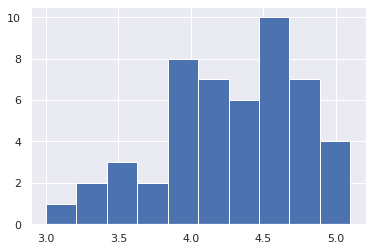

In [ ]:
# Plotting a histogram

# Plotting a histogram of iris data

# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Show histogram
plt.show()

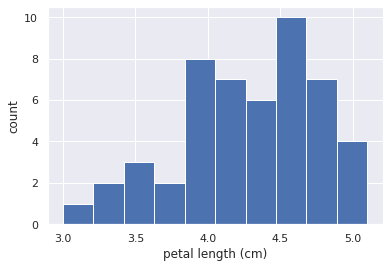

In [ ]:
# Axis labels!

# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

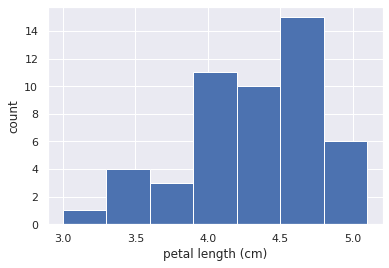

In [ ]:
# Adjusting the number of bins in a histogram

# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


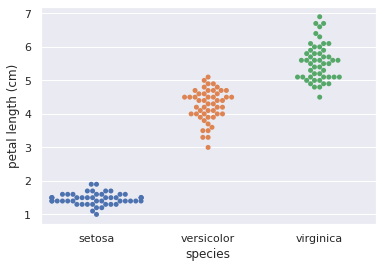

In [ ]:
# Plot all of your data: Bee swarm plots

# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

**Interpreting a bee swarm plot**

Which of the following conclusions could you draw from the bee swarm plot of iris petal lengths you generated in the previous exercise? For your convenience, the bee swarm plot is regenerated and shown to the right.

**Possible Answers**

- [ ] All I. versicolor petals are shorter than I. virginica petals.
- [ ] I. setosa petals have a broader range of lengths than the other two species.
- [x] I. virginica petals tend to be the longest, and I. setosa petals tend to be the shortest of the three species.
- [ ] I. versicolor is a hybrid of I. virginica and I. setosa.

Correct! Notice that we said "tend to be." Some individual I. virginica flowers may be shorter than individual I. versicolor flowers. It is also possible that an individual I. setosa flower may have longer petals than in individual I. versicolor flower, though this is highly unlikely, and was not observed by Anderson.

In [7]:
# Plot all of your data: ECDFs

# Computing the ECDF

def ecdf(data):

    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

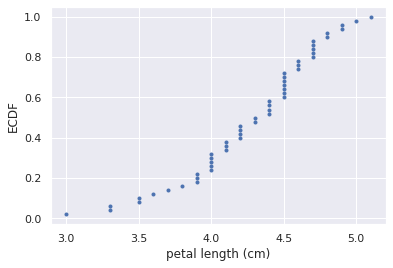

In [ ]:
# Plotting the ECDF

# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

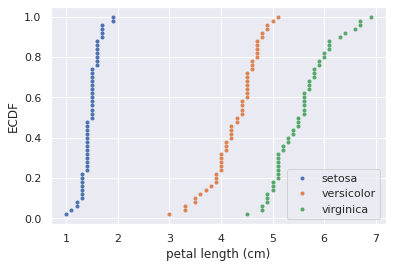

In [ ]:
# Comparison of ECDFs

# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Annotate the plot
_ = plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

In [ ]:
# Onward toward the whole story!

## 2. Quantitative exploratory data analysis

In [ ]:
# Introduction to summary statistics: The sample mean and median

**Means and medians**

Which one of the following statements is true about means and medians?

**Possible Answers**

- [ ] An outlier can significantly affect the value of both the mean and the median.
- [x] An outlier can significantly affect the value of the mean, but not the median.
- [ ] Means and medians are in general both robust to single outliers.
- [ ] The mean and median are equal if there is an odd number of data points.

In [ ]:
# Computing means

# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


In [ ]:
# Percentiles, outliers, and box plots

# Computing percentiles

# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


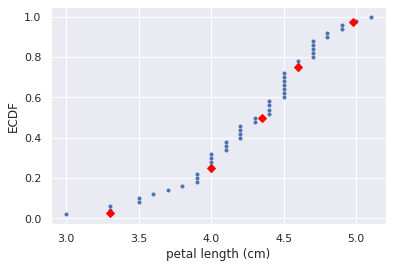

In [ ]:
# Comparing percentiles to ECDF

# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

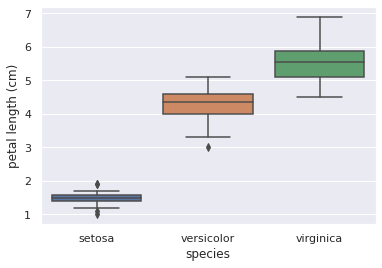

In [ ]:
# Box-and-whisker plot

# Create box plot with Seaborn's default settings
sns.boxplot(x = 'species', y = 'petal length (cm)', data = df)

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

In [ ]:
# Variance and standard deviation

# Computing the variance

# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000012 0.21640000000000012


In [ ]:
# The standard deviation and the variance

# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845204
0.4651881339845204


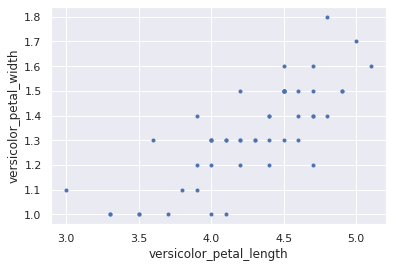

In [ ]:
# Covariance and the Pearson correlation coefficient

# Scatter plots

# Make a scatter plot
plt.plot(versicolor_petal_length, versicolor_petal_width, marker = '.', linestyle = 'none')

# Label the axes
plt.xlabel('versicolor_petal_length')
plt.ylabel('versicolor_petal_width')

# Show the result
plt.show()

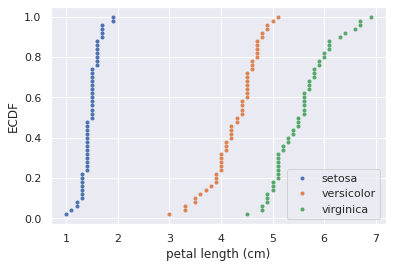

In [ ]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Annotate the plot
_ = plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

**Variance and covariance by looking**

Consider four scatter plots of - data, appearing to the right. 

![](https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/images/Variance_and_covariance.jpg)

Which has, respectively,

- the highest variance in the variable ,
- the highest covariance,
- negative covariance?

**Possible Answers**

- [ ] a, c, b
- [ ] d, c, a
- [ ] d, c, b
- [ ] d, d, b

In [ ]:
# Computing the covariance

# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


In [ ]:
# Computing the Pearson correlation coefficient

def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


## 3. Thinking probabilistically-- Discrete variables

In [ ]:
# Probabilistic logic and statistical inference

**What is the goal of statistical inference?**

Why do we do statistical inference?

**Possible Answers**

- [ ] To draw probabilistic conclusions about what we might expect if we collected the same data again.
- [ ] To draw actionable conclusions from data.
- [ ] To draw more general conclusions from relatively few data or observations.
- [x] All of these.


**Why do we use the language of probability?**

Which of the following is not a reason why we use probabilistic language in statistical inference?

**Possible Answers**

- [ ] Probability provides a measure of uncertainty.
- [x] Probabilistic language is not very precise.
- [ ] Data are almost never exactly the same when acquired again, and probability allows us to say how much we expect them to vary.

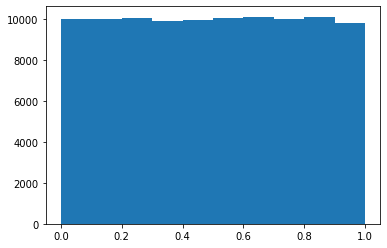

In [3]:
# Random number generators and hacker statistics

# Generating random numbers using the np.random module

import numpy as np
import matplotlib.pyplot as plt

# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

In [4]:
# The np.random module and Bernoulli trials

def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1
            
    return n_success

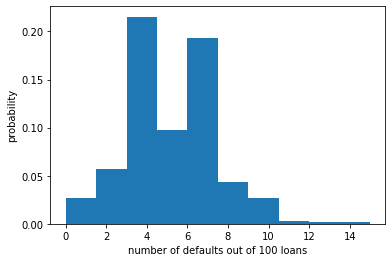

In [5]:
# How many defaults might we expect?

# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density = True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

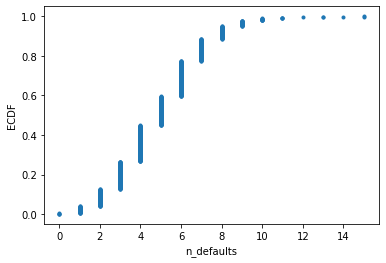

Probability of losing money = 0.022


In [8]:
# Will the bank fail?

# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.xlabel('n_defaults')
plt.ylabel('ECDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

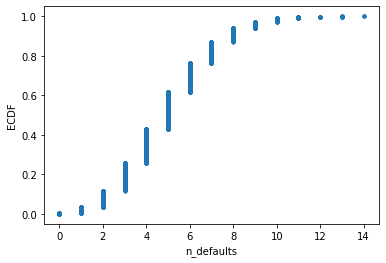

In [9]:
# Probability distributions and stories: The Binomial distribution

# Sampling out of the Binomial distribution

# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n = 100, p = 0.05, size = 10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.xlabel('n_defaults')
plt.ylabel('ECDF')

# Show the plot
plt.show()

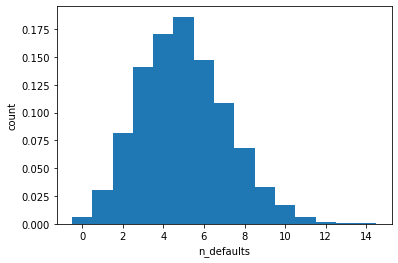

In [10]:
# Plotting the Binomial PMF

# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults, density = True, bins = bins)

# Label axes
plt.xlabel('n_defaults')
plt.ylabel('count')

# Show the plot
plt.show()

In [11]:
# Poisson processes and the Poisson distribution

# Relationship between Binomial and Poisson distributions

# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      10.0145 3.1713545607516043
n = 20 Binom: 10.0592 2.23523944131272
n = 100 Binom: 10.0441 2.9942536949964675
n = 1000 Binom: 10.0129 3.139639085946026


**How many no-hitters in a season?**

In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. The ECDF of the number of no-hitters in a season is shown to the right. 

![](https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/images/no-hitters.jpg)

Which probability distribution would be appropriate to describe the number of no-hitters we would expect in a given season?

Note: The no-hitter data set was scraped and calculated from the data sets available at retrosheet.org (license).

**Possible Answers**

- [ ] Discrete uniform
- [ ] Binomial
- [ ] Poisson
- [x] Both Binomial and Poisson, though Poisson is easier to model and compute.
- [ ] Both Binomial and Poisson, though Binomial is easier to model and compute.

In [12]:
# Was 2015 anomalous?

# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size = 10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0072


## 4. Thinking probabilistically-- Continuous variables

**Interpreting PDFs**

Consider the PDF shown to the right (it may take a second to load!). 

![](https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/images/pdfs.jpg)

Which of the following is true?

**Possible Answers**

- [x] x is more likely to be less than 10 than to be greater than 10.
- [ ] is more likely to be greater than 10 than to be less than 10.
- [ ] We cannot tell from the PDF if x is more likely to be greater than or less than 10.
- [ ] This is not a valid PDF because it has two peaks.

**Interpreting CDFs**

At right is the CDF corresponding to the PDF you considered in the last exercise. 

![](https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/images/cdfs.jpg)

Using the CDF, what is the probability that  is greater than 10?

**Possible Answers**

- [x] 0.25
- [ ] 0.75
- [ ] 3.75
- [ ] 15

Correct! The value of the CDF at x = 10 is 0.75, so the probability that x < 10 is 0.75. Thus, the probability that x > 10 is 0.25.

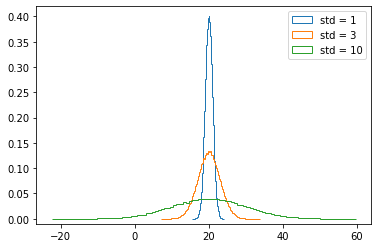

In [13]:
# Introduction to the Normal distribution

# The Normal PDF

# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10

samples_std1 = np.random.normal(20, 1, 100000)
samples_std3= np.random.normal(20, 3, 100000)
samples_std10= np.random.normal(20, 10, 100000)

# Make histograms
plt.hist(samples_std1, density = True, histtype = 'step', bins = 100)
plt.hist(samples_std3, density = True, histtype = 'step', bins = 100)
plt.hist(samples_std10, density = True, histtype = 'step', bins = 100)

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

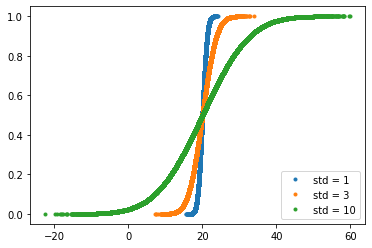

In [14]:
# The Normal CDF

# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1) 
x_std3, y_std3 = ecdf(samples_std3)  
x_std10, y_std10= ecdf(samples_std10) 

# Plot CDFs
plt.plot(x_std1, y_std1 , marker = '.', linestyle = 'none')
plt.plot(x_std3, y_std3 , marker = '.', linestyle = 'none')
plt.plot(x_std10, y_std10 , marker = '.', linestyle = 'none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

In [ ]:
# The Normal distribution: Properties and warnings

**Gauss and the 10 Deutschmark banknote**

What are the mean and standard deviation, respectively, of the Normal distribution that was on the 10 Deutschmark banknote, shown to the right?

![](https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/images/banknote.jpg)

**Possible Answers**

- [x] mean = 3, std = 1
- [ ] mean = 3, std = 2
- [ ] mean = 0.4, std = 1
- [ ] mean = 0.6, std = 6

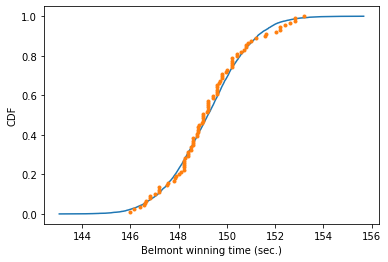

In [17]:
# Are the Belmont Stakes results Normally distributed?

import pandas as pd
import numpy as np

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/belmont.csv'
belmont = pd.read_csv(filename)
belmont_no_outliers = belmont[~((belmont['Year'] == 1970) | (belmont['Year'] == 1973))].Time

def convert(x): 
    return float(x.split(':')[0]) * 60 + float(x.split(':')[1].split('.')[0]) + float(x.split('.')[-1])/100
belmont_no_outliers = belmont_no_outliers.apply(convert)

# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

In [18]:
# What are the chances of a horse matching or beating Secretariat's record?

mu = 149.22101123595507 
sigma = 1.627816471774816

# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, 1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) / 1000000

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000638


In [ ]:
# The Exponential distribution

**Matching a story and a distribution**

How might we expect the time between Major League no-hitters to be distributed? Be careful here: a few exercises ago, we considered the probability distribution for the number of no-hitters in a season. 

Now, we are looking at the probability distribution of the time between no hitters.

**Possible Answers**

- [ ] Normal
- [x] Exponential
- [ ] Poisson
- [ ] Uniform


**Waiting for the next Secretariat**

Unfortunately, Justin was not alive when Secretariat ran the Belmont in 1973. Do you think he will get to see a performance like that? 

To answer this, you are interested in how many years you would expect to wait until you see another performance like Secretariat's. How is the waiting time until the next performance as good or better than Secretariat's distributed? Choose the best answer.

**Possible Answers**

- [ ] Normal, because the distribution of Belmont winning times are Normally distributed.
- [ ] Normal, because there is a most-expected waiting time, so there should be a single peak to the distribution.
- [ ] Exponential: It is very unlikely for a horse to be faster than Secretariat, so the distribution should decay away to zero for high waiting time.
- [x] Exponential: A horse as fast as Secretariat is a rare event, which can be modeled as a Poisson process, and the waiting time between arrivals of a Poisson process is Exponentially distributed.

In [19]:
# If you have a story, you can simulate it!

def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

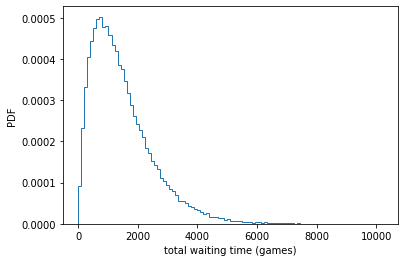

In [20]:
# Distribution of no-hitters and cycles

# Draw samples of waiting times: waiting_times
# Draw samples of waiting times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, histtype='step', density=True)

# Label axes
_ = plt.xlabel('total waiting time (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()